## Unsupervised learning

In [43]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler


### Exemplos de informações calculadas manualmente - importantes para algumas métricas de métodos diferentes de k-means

In [2]:
df = {
    'x1': [1.0,1.5,3.0,5.0,3.5,4.5,3.5],
    'x2': [1.0,2.0,4.0,7.0,5.0,5.0,4.5]
}
df=pd.DataFrame(df)
df

x1   x2
0  1.0  1.0
1  1.5  2.0
2  3.0  4.0
3  5.0  7.0
4  3.5  5.0
5  4.5  5.0
6  3.5  4.5

#### Ajuste do modelo com algumas informações prontas

In [3]:
n_clusters = 3
clf = KMeans(n_clusters , init = np.array([[1.0, 1.0], [5.0,7.0],[2,3]], np.float64), n_init = 1)

clf.fit(df)
clusters_labels = clf.predict(df)
print 'Centroides: ', clf.cluster_centers_
print '\nInertia ou WCSS: ', clf.inertia_
print '\nClusters preditos: ' ,clusters_labels

Centroides:  [[ 1.25        1.5       ]
 [ 4.75        6.        ]
 [ 3.33333333  4.5       ]]

Inertia ou WCSS:  3.41666666667

Clusters preditos:  [0 0 2 1 2 1 2]


#### Cálculo centroides na mão

In [6]:
df_total = pd.concat([df, pd.DataFrame(clusters_labels, columns = ['label'])], axis = 1)
centroides_m = df_total.groupby(by = ['label']).mean()
print centroides_m
print '\n'
print df_total

             x1   x2
label               
0      1.250000  1.5
1      4.750000  6.0
2      3.333333  4.5


    x1   x2  label
0  1.0  1.0      0
1  1.5  2.0      0
2  3.0  4.0      2
3  5.0  7.0      1
4  3.5  5.0      2
5  4.5  5.0      1
6  3.5  4.5      2


#### cálculo inertia ou wmcc na mão

In [7]:
a = []
first=True
for k in range(n_clusters):
    df_total2 = df_total[df_total.label == k]
    aux = euclidean_distances(df_total2.iloc[:,0:(df_total2.shape[1]-1)], centroides_m[centroides_m.index == k])**2
    aux = pd.DataFrame(aux)
    if first == True:
        a=pd.DataFrame(aux)
        first = False
    else:
        a = pd.concat([a, aux], axis = 0)
        
    #a.append(aux)
    
wcss_m = np.float(a.sum())
wcss_m

3.4166666666666643

#### silhueta

In [8]:
silhueta = silhouette_score(df,  clusters_labels)
silhueta

0.46046600146599725

#### total sum-of-squares

In [11]:
media_geral = df.mean()
media_geral = media_geral.values.reshape(1,-1)
media_geral
tss = euclidean_distances(df, media_geral)
tss = pd.DataFrame(tss)
tss_m = np.float(tss.sum())
tss_m
bcss_m = tss_m - wcss_m
print 'TSS:', tss_m
print 'BCSS:', bcss_m

TSS: 13.2135569382
BCSS: 9.79689027155


#### calcular distâncias minima e máxima entre pontos de clusters diferentes

In [12]:
df_total

x1   x2  label
0  1.0  1.0      0
1  1.5  2.0      0
2  3.0  4.0      2
3  5.0  7.0      1
4  3.5  5.0      2
5  4.5  5.0      1
6  3.5  4.5      2

In [22]:
df0 = df_total[df_total.label==0].iloc[:,0:2]
df1 = df_total[df_total.label==1].iloc[:,0:2]
df2 = df_total[df_total.label==2].iloc[:,0:2]

In [30]:
dpairs_01 = euclidean_distances(df0,df1)
dpairs_02 = euclidean_distances(df0,df2)
dpairs_12 = euclidean_distances(df1,df2)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------


In [42]:
def information_data (data):
       
    len_array = []
    for var in data.columns:
        current_len  = len(data[var].unique())
        len_array.append(current_len)

    missing = pd.DataFrame(np.array(data.isnull().sum()), columns = ['missing'])
    p_missing = missing / data.shape[0]
    types = pd.DataFrame( np.array(data.dtypes), columns=['type'])

    qtd = pd.concat([pd.DataFrame(data.columns), types.type, missing.missing, pd.DataFrame(p_missing),  pd.DataFrame(len_array)], axis = 1)
    qtd.columns = ['var', 'type', '# missing','% missing', '# unique values']
    
    print 'Data with', data.shape[0], 'samples and ', data.shape[1], 'features'
    print '\n'
    print 'Data with', qtd[qtd['# missing'] > 0].shape[0], 'columns with missings'
    print '\n'
    
    return qtd

def fit_transform_with_function (data, function, sklearn):
    scaler = function
    
    if sklearn == 'True':
        scaler = function
        data_transformed = scaler.fit_transform(data)
        data_transformed2 = pd.DataFrame(data_transformed, columns = data.columns, index = data.index)
        
    else:
        data_transformed2 = data.apply(function)
        
    return scaler, data_transformed2

#X_train.apply(standard_scaler_manual)


def transform_with_function (data, scaler, sklearn):
    
    if sklearn == 'True':
        data_transformed = scaler.transform(data)
        data_transformed2 = pd.DataFrame(data_transformed, columns = data.columns, index = data.index)
    
    else:
        data_transformed2 = data.apply(scaler)
    
        
    
    return data_transformed2

In [32]:
data = pd.read_csv('data_cluster.csv', sep=';', decimal = ',')
data.head()

y                  x1                   x2                  x3  \
1  3  -0.560475646552213   -0.995798724851333  -0.511603722189581   
2  3   -0.23017748948328    -1.03995504376619   0.236937879127631   
3  2    1.55870831414912  -0.0179802405766626  -0.541589171621698   
4  3   0.070508391424576   -0.132175132856735    1.21922764704307   
5  3   0.129287735160946    -2.54934277475043   0.174135875106149   

                   x4                 x5  x6  x7  x8  x9  
1  -0.150307477864079   0.19654977656002   1   0   0   0  
2  -0.327757132786462  0.650113188667264   1   0   0   0  
3   -1.44816529018399  0.671004187901994   0   0   1   0  
4  -0.697284584551622  -1.28415776513223   1   1   1   0  
5    2.59849023212988  -2.02610958278953   1   0   0   1

In [33]:
information_data(data)

Data with 1000 samples and  10 features


Data with 0 columns with missings




var    type  # missing  % missing  # unique values
0   y   int64          0        0.0                3
1  x1  object          0        0.0             1000
2  x2  object          0        0.0             1000
3  x3  object          0        0.0             1000
4  x4  object          0        0.0             1000
5  x5  object          0        0.0             1000
6  x6   int64          0        0.0                2
7  x7   int64          0        0.0                2
8  x8   int64          0        0.0                2
9  x9   int64          0        0.0                2

### K-MEANS

In [34]:
data2 = data.drop(['y'], axis = 1)


In [35]:
X = data2.iloc[0:900,:]
X_pred = data2.iloc[900:1000,:]
Y = data.iloc[0:900, 0]
Y_pred = data.iloc[900:1000, 0]

In [36]:
Y_pred.shape

(100L,)

In [37]:
array_init = np.array([[-0.04,2,0.4,0.02,0.04,0.3,0.05,0.04,0.9],
              [0.04,2,0.4,1,0.04,0.03,0.05,0.04,0.19],
              [-0.4,2,4,0.02,0.04,0.33,0.15,0.24,0.39]], np.float64)

In [38]:
n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=10,init = 'k-means++', max_iter=300,verbose=0)
#escolhendo pontos iniciais
#kmeans = KMeans(n_clusters=3, random_state=10, init = array_init, n_init = 1)

In [39]:
cluster_labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_ 
inertia = kmeans.inertia_
inertia

3902.2640493890949

In [40]:
silhueta = silhouette_score(X, cluster_labels)
silhueta

0.11086715677595291

### Elbow Method

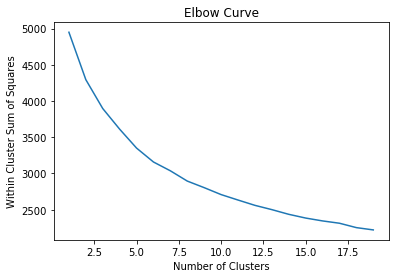

In [12]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Curve')
plt.show()

#### predicao

In [13]:
pred_cluster = clusterer.predict(X_pred)
pred_cluster

array([0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 1,
       2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0,
       2, 1, 2, 2, 0, 1, 0, 1])

#### Função para testar varios k diferentes

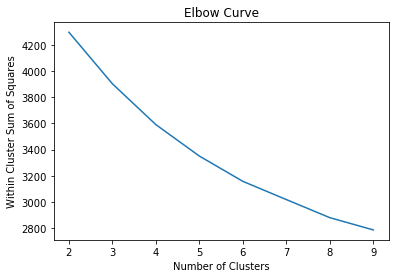

score_wss  silhueta
2     4295.1    0.1245
3     3902.1    0.1146
4     3590.8    0.1139
5     3351.1    0.1142
6     3158.4    0.1202
7     3019.5    0.1141
8     2881.6    0.1173
9     2788.1    0.1131

In [41]:
k_values = range(2,10)
first=True
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X)
    score_wss = round(kmeans.inertia_ ,1)
    silhueta = round(silhouette_score(X, cluster_labels),4)
    #plt.plot(Nc,score)
    #plt.xlabel('Number of Clusters')
    #plt.ylabel('Within Cluster Sum of Squares')
    #plt.title('Elbow Curve')
    #plt.show()
    resultados_aux = {
        'score_wss': score_wss,
        'silhueta': silhueta
    }
    resultados_aux = pd.DataFrame(resultados_aux, index = [k])
    if first == True:
        resultados_final = resultados_aux
        first = False
    else:
        resultados_final = pd.concat([resultados_final, resultados_aux],axis =0)
        

plt.plot(resultados_final.index,resultados_final.score_wss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Curve')
plt.show()

resultados_final

### Aplicação de PCA na base iris - com visualização 

In [44]:
from sklearn.datasets import load_iris

In [45]:
iris = load_iris()
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['target']  = iris.target

print information_data(data)
data.head()

Data with 150 samples and  5 features


Data with 0 columns with missings


                 var     type  # missing  % missing  # unique values
0  sepal length (cm)  float64          0        0.0               35
1   sepal width (cm)  float64          0        0.0               23
2  petal length (cm)  float64          0        0.0               43
3   petal width (cm)  float64          0        0.0               22
4             target    int32          0        0.0                3


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [46]:
Y = data.iloc[0:140, 4]
Y_pred = data.iloc[140:150, 4]
data.drop(['target'], axis = 1, inplace=True)
X = data.iloc[0:140, :]
X_pred = data.iloc[140:150, :]


In [47]:
scaler, new_data = fit_transform_with_function(X, StandardScaler(), 'True')

In [48]:
new_data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.841395          1.004906          -1.272127         -1.260189
1          -1.081794         -0.126017          -1.272127         -1.260189
2          -1.322193          0.326352          -1.328756         -1.260189
3          -1.442392          0.100167          -1.215498         -1.260189
4          -0.961595          1.231090          -1.272127         -1.260189

In [49]:
pca = PCA(n_components=2)
pc = pca.fit_transform(new_data)
pcDf = pd.DataFrame(data = pc, columns = ['PC 1', 'PC 2'])
finalDf = pd.concat([pcDf, Y], axis = 1)
#finalDf

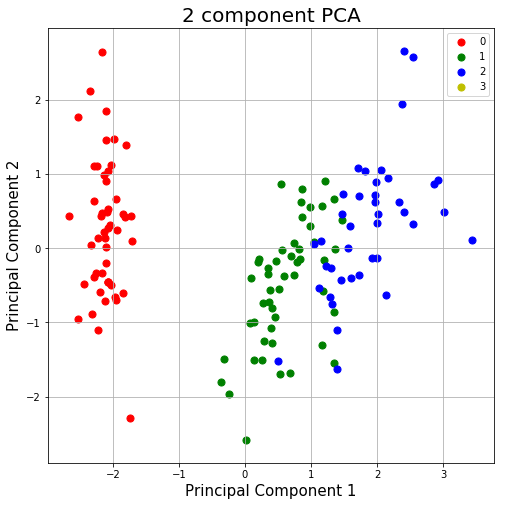

In [50]:
def plot_PCA_groups (data, group):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    #targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

    targets = [0 ,1 ,2, 3]
    colors = ['r', 'g', 'b', 'y']
    for target, color in zip(targets,colors):
        indicesToKeep = data[group] == target
        ax.scatter(data.loc[indicesToKeep, 'PC 1']
                   , data.loc[indicesToKeep, 'PC 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    return fig

plot_PCA_groups(finalDf, 'target')

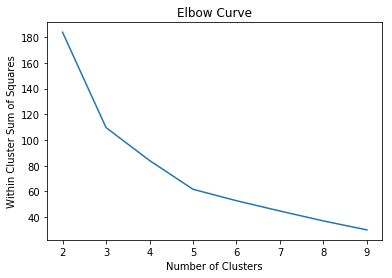

score_wss  silhueta
2      183.8    0.6124
3      109.7    0.5076
4       84.1    0.4406
5       61.7    0.4198
6       52.8    0.4292
7       44.8    0.4258
8       37.1    0.4207
9       30.1    0.4401

In [52]:
base = pcDf
k_values = range(2,10)
first=True
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(base)
    score_wss = round(kmeans.inertia_ ,1)
    silhueta = round(silhouette_score(base, cluster_labels),4)
    resultados_aux = {
        'score_wss': score_wss,
        'silhueta': silhueta
    }
    resultados_aux = pd.DataFrame(resultados_aux, index = [k])
    if first == True:
        resultados_final = resultados_aux
        first = False
    else:
        resultados_final = pd.concat([resultados_final, resultados_aux],axis =0)
        

plt.plot(resultados_final.index,resultados_final.score_wss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow Curve')
plt.show()

resultados_final

In [53]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_sempca = KMeans(n_clusters=3)

kmeans_sempca.fit(new_data)
kmeans_pca.fit(pcDf)

cluster_labels_sempca = kmeans_sempca.predict(new_data)
cluster_labels_compca = kmeans_pca.predict(pcDf)

#cluster_labels_compca = kmeans_compca.predict(pcDf)

In [58]:
cluster_labels_compca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2])

In [59]:
# tabela fim
previsoes = pd.concat([finalDf, pd.DataFrame(cluster_labels_sempca), pd.DataFrame(cluster_labels_compca)], axis = 1)
previsoes.columns = ['PC 1', 'PC 2', 'target', 'prev_sempca', 'prev_compca']
previsoes
#pd.crosstab(previsoes.target, previsoes.prev_sempca)

PC 1      PC 2  target  prev_sempca  prev_compca
0   -2.163730  0.477686       0            1            1
1   -1.974200 -0.653524       0            1            1
2   -2.256933 -0.335834       0            1            1
3   -2.190676 -0.587235       0            1            1
4   -2.288683  0.637372       0            1            1
5   -1.976561  1.469842       0            1            1
6   -2.335202  0.040553       0            1            1
7   -2.130301  0.224603       0            1            1
8   -2.222303 -1.098450       0            1            1
9   -2.080779 -0.452408       0            1            1
10  -2.069927  1.036440       0            1            1
11  -2.221825  0.131205       0            1            1
12  -2.113007 -0.708856       0            1            1
13  -2.522372 -0.951604       0            1            1
14  -2.108038  1.843231       0            1            1
15  -2.169572  2.645227       0            1            1
16  -2.107875  1.463112       0            1            1
17  -2.087099  0.485478       0            1            1
18  -1.803888  1.397444       0            1            1
19  -2.242600  1.108839       0            1            1
20  -1.815941  0.418127       0            1            1
21  -2.103192  0.909405       0            1            1
22  -2.668700  0.440482       0            1            1
23  -1.709798  0.091659       0            1            1
24  -2.123339  0.136252       0            1            1
25  -1.846367 -0.602619       0            1            1
26  -1.944210  0.241870       0            1            1
27  -2.068726  0.526908       0            1            1
28  -2.038778  0.318000       0            1            1
29  -2.158448 -0.330787       0            1            1
..        ...       ...     ...          ...          ...
110  1.489079  0.724083       2            0            2
111  1.729811 -0.364014       2            0            2
112  2.009105  0.466774       2            0            2
113  1.398278 -1.108501       2            2            0
114  1.611478 -0.406431       2            2            2
115  1.722454  0.703286       2            0            2
116  1.592683  0.300776       2            0            2
117  2.537049  2.580423       2            0            2
118  3.432656  0.104869       2            0            2
119  1.389979 -1.626521       2            2            0
120  2.164647  0.947715       2            0            2
121  1.114945 -0.536045       2            2            0
122  3.011552  0.492578       2            0            2
123  1.459690 -0.426076       2            2            0
124  1.824256  1.044276       2            0            2
125  2.066504  1.056420       2            0            2
126  1.301909 -0.268073       2            2            0
127  1.147009  0.100521       2            0            2
128  1.918783 -0.136156       2            0            2
129  1.973138  0.623018       2            0            2
130  2.551422  0.332071       2            0            2
131  2.409653  2.654871       2            0            2
132  1.995414 -0.128363       2            0            2
133  1.232677 -0.238863       2            2            0
134  1.321389 -0.747775       2            2            0
135  2.918922  0.920313       2            0            2
136  1.709842  1.083037       2            0            2
137  1.467731  0.460462       2            0            2
138  1.052004  0.051299       2            2            2
139  1.975676  0.719857       2            0            2

[140 rows x 5 columns]

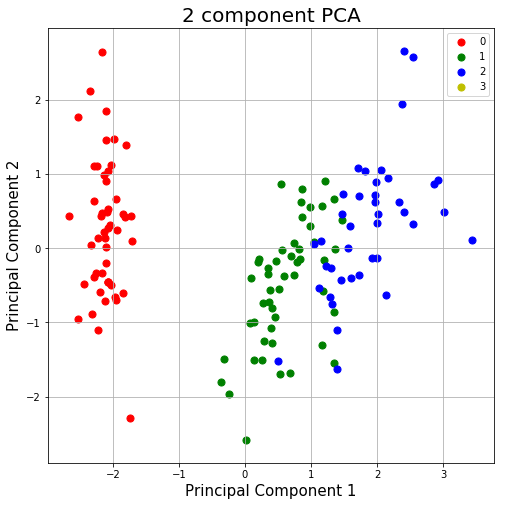

In [60]:
plot_PCA_groups(previsoes, 'target')

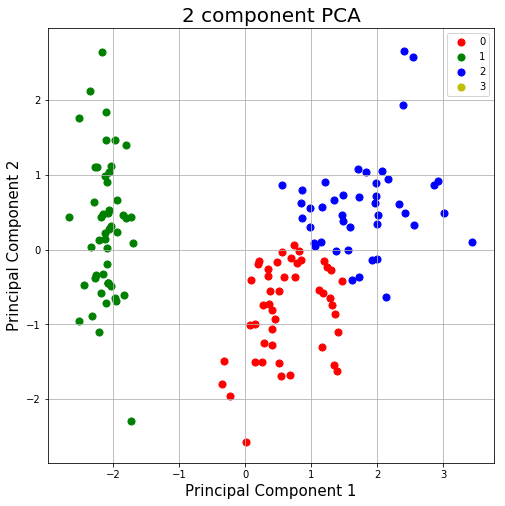

In [63]:
plot_PCA_groups(previsoes, 'prev_compca')

#### Predição para os casos de PCA

usar scaler 

In [64]:
new_data_pred = transform_with_function(X_pred, scaler, 'True')

In [65]:
pred_clusters_extra = pca.transform(new_data_pred)
pred_clusters_extra

array([[ 2.14687477,  0.65151938],
       [ 2.03045287,  0.7303947 ],
       [ 1.29109863, -0.65261902],
       [ 2.16812842,  0.90354015],
       [ 2.13078156,  1.0754462 ],
       [ 2.00170601,  0.42977119],
       [ 1.69470269, -0.83105335],
       [ 1.64746037,  0.31131373],
       [ 1.50537747,  1.02433985],
       [ 1.08831383,  0.00880632]])

In [66]:
pcDf_pred = pd.DataFrame(data = pred_clusters_extra, columns = ['PC 1', 'PC 2'])

In [67]:
clusteres_pred = kmeans_pca.predict(pcDf_pred)
clusteres_pred

array([2, 2, 0, 2, 2, 2, 0, 2, 2, 2])

In [69]:
pred_total = pd.concat([pcDf_pred, pd.DataFrame(Y_pred).reset_index(drop=True), pd.DataFrame (clusteres_pred, columns=['pred'])], axis = 1)
pred_total

PC 1      PC 2  target  pred
0  2.146875  0.651519       2     2
1  2.030453  0.730395       2     2
2  1.291099 -0.652619       2     0
3  2.168128  0.903540       2     2
4  2.130782  1.075446       2     2
5  2.001706  0.429771       2     2
6  1.694703 -0.831053       2     0
7  1.647460  0.311314       2     2
8  1.505377  1.024340       2     2
9  1.088314  0.008806       2     2